In [71]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
df = pd.read_excel('общие данные.xls')

In [35]:
df.head()

,Structure,Animal,YWHAZ,OSBP,IGF2,c-FOS,A2M,Group
0,lvDG +,121,22.505319,30.602556,30.101435,32.476285,30.645986,физ р-р
1,lvDG +,123,23.067098,31.344263,30.634159,33.843709,31.498869,ПК
2,lvDG +,124,22.073929,29.472286,27.768363,31.683928,30.088215,физ р-р
3,lvDG +,125,21.928077,29.528822,28.821534,31.956568,29.561416,L-NAME
4,lvDG +,126,22.116176,29.843432,28.320843,32.004298,29.895815,ПК


In [36]:
df.columns

Index(['Structure', 'Animal', 'YWHAZ', 'OSBP', 'IGF2', 'c-FOS', 'A2M',
       'Group'],
      dtype='object')

In [37]:
df['Structure'].unique()

array(['lvDG +', 'lvCA1 +', 'ldCA1 +'], dtype=object)

In [38]:
lvDG = df[df['Structure'] == 'lvDG +']

In [39]:
passive_control = lvDG[lvDG['Group'] == 'ПК']

In [40]:
gene_list = df.columns[2:7]
gene_list

Index(['YWHAZ', 'OSBP', 'IGF2', 'c-FOS', 'A2M'], dtype='object')

In [41]:
mean_values = passive_control[gene_list].mean()

In [42]:
mean_values    

YWHAZ    22.410294
OSBP     30.233003
IGF2     29.493233
c-FOS    32.972953
A2M      30.463807
dtype: float64

In [43]:
mean_values['YWHAZ']

22.410294105611737

In [44]:
gene_effs = {
            'YWHAZ': 2.06,
            'OSBP': 2,
            'IGF2': 1.83,
            'c-FOS': 2.06,
            'A2M': 1.81
            }

In [47]:
for gene in gene_list:
    name = 'd' + gene
    ostatok = lvDG[gene] - mean_values[gene]
    lvDG[name] = gene_effs[gene] ** (-ostatok)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [48]:
lvDG.head()

,Structure,Animal,YWHAZ,OSBP,IGF2,c-FOS,A2M,Group,dYWHAZ,dOSBP,dIGF2,dc-FOS,dA2M
0,lvDG +,121,22.505319,30.602556,30.101435,32.476285,30.645986,физ р-р,0.933630,0.774022,0.692431,1.431818,0.897546
1,lvDG +,123,23.067098,31.344263,30.634159,33.843709,31.498869,ПК,0.622087,0.462890,0.501837,0.532965,0.541112
2,lvDG +,124,22.073929,29.472286,27.768363,31.683928,30.088215,физ р-р,1.275188,1.694332,2.835921,2.538532,1.249632
3,lvDG +,125,21.928077,29.528822,28.821534,31.956568,29.561416,L-NAME,1.416943,1.629220,1.500680,2.084538,1.708154
4,lvDG +,126,22.116176,29.843432,28.320843,32.004298,29.895815,ПК,1.236841,1.310003,2.030931,2.013859,1.400746


In [49]:
  lvDG['Ref_gmean'] = (lvDG['dYWHAZ'] * lvDG['dOSBP']) ** (1 / 2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
lvDG.head()

,Structure,Animal,YWHAZ,OSBP,IGF2,c-FOS,A2M,Group,dYWHAZ,dOSBP,dIGF2,dc-FOS,dA2M,Ref_gmean
0,lvDG +,121,22.505319,30.602556,30.101435,32.476285,30.645986,физ р-р,0.933630,0.774022,0.692431,1.431818,0.897546,0.850088
1,lvDG +,123,23.067098,31.344263,30.634159,33.843709,31.498869,ПК,0.622087,0.462890,0.501837,0.532965,0.541112,0.536617
2,lvDG +,124,22.073929,29.472286,27.768363,31.683928,30.088215,физ р-р,1.275188,1.694332,2.835921,2.538532,1.249632,1.469895
3,lvDG +,125,21.928077,29.528822,28.821534,31.956568,29.561416,L-NAME,1.416943,1.629220,1.500680,2.084538,1.708154,1.519378
4,lvDG +,126,22.116176,29.843432,28.320843,32.004298,29.895815,ПК,1.236841,1.310003,2.030931,2.013859,1.400746,1.272897


In [59]:
dgene_list = ['dIGF2', 'dc-FOS','dA2M']
# dgene_list = ['d'+ a for a in gene_list[2:5]]

for gene in dgene_list:
    name = 'd' + gene
    lvDG[name] = (lvDG[gene] / lvDG['Ref_gmean'])
    
#astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [60]:
lvDG.head()

,Structure,Animal,YWHAZ,OSBP,IGF2,c-FOS,A2M,Group,dYWHAZ,dOSBP,dIGF2,dc-FOS,dA2M,Ref_gmean,ddIGF2,ddc-FOS,ddA2M
0,lvDG +,121,22.505319,30.602556,30.101435,32.476285,30.645986,физ р-р,0.933630,0.774022,0.692431,1.431818,0.897546,0.850088,0.814540,1.684317,1.055826
1,lvDG +,123,23.067098,31.344263,30.634159,33.843709,31.498869,ПК,0.622087,0.462890,0.501837,0.532965,0.541112,0.536617,0.935188,0.993194,1.008376
2,lvDG +,124,22.073929,29.472286,27.768363,31.683928,30.088215,физ р-р,1.275188,1.694332,2.835921,2.538532,1.249632,1.469895,1.929336,1.727016,0.850151
3,lvDG +,125,21.928077,29.528822,28.821534,31.956568,29.561416,L-NAME,1.416943,1.629220,1.500680,2.084538,1.708154,1.519378,0.987694,1.371968,1.124245
4,lvDG +,126,22.116176,29.843432,28.320843,32.004298,29.895815,ПК,1.236841,1.310003,2.030931,2.013859,1.400746,1.272897,1.595519,1.582107,1.100440


In [68]:
ddgene_list = ['dd'+ a for a in gene_list[2:5]]
ddgene_list.append('Group')
print(ddgene_list)

['ddIGF2', 'ddc-FOS', 'ddA2M', 'Group']


In [69]:
final_df = lvDG[ddgene_list]

In [70]:
final_df.head()

,ddIGF2,ddc-FOS,ddA2M,Group
0,0.814540,1.684317,1.055826,физ р-р
1,0.935188,0.993194,1.008376,ПК
2,1.929336,1.727016,0.850151,физ р-р
3,0.987694,1.371968,1.124245,L-NAME
4,1.595519,1.582107,1.100440,ПК


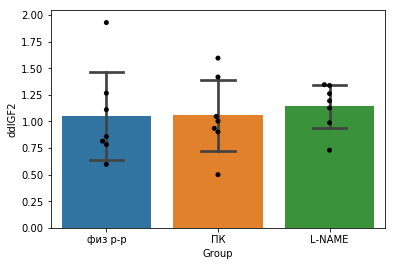

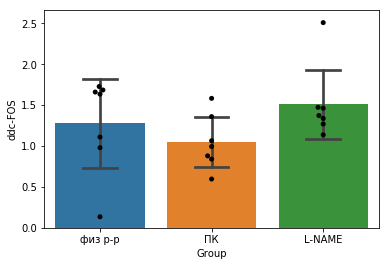

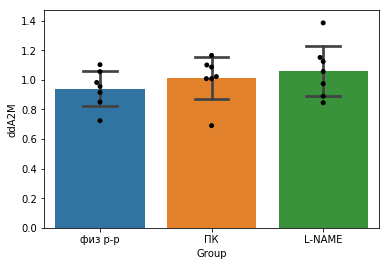

In [88]:
for gene in ['ddIGF2', 'ddc-FOS', 'ddA2M']:
    
    sns.barplot(x="Group", 
                y=gene, 
                data=lvDG, 
                capsize=.3, 
                ci='sd',
                saturation=0.75)
    sns.swarmplot(x="Group", 
                y=gene, 
                data=lvDG,
                color='black'
                )
    plt.show()

In [89]:
final_df.head()

,ddIGF2,ddc-FOS,ddA2M,Group
0,0.814540,1.684317,1.055826,физ р-р
1,0.935188,0.993194,1.008376,ПК
2,1.929336,1.727016,0.850151,физ р-р
3,0.987694,1.371968,1.124245,L-NAME
4,1.595519,1.582107,1.100440,ПК


In [99]:
ix = final_df.reindex(final_df.Group)

In [100]:
lvDG.T.iloc[:8].T.to_excel('lvDG2.xls')

,ddIGF2,ddc-FOS,ddA2M,Group
Group,,,,
физ р-р,NaN,NaN,NaN,NaN
ПК,NaN,NaN,NaN,NaN
физ р-р,NaN,NaN,NaN,NaN
L-NAME,NaN,NaN,NaN,NaN
ПК,NaN,NaN,NaN,NaN
L-NAME,NaN,NaN,NaN,NaN
физ р-р,NaN,NaN,NaN,NaN
L-NAME,NaN,NaN,NaN,NaN
ПК,NaN,NaN,NaN,NaN
